# Linear Models in Python

We continue with the Chicago redlining example we have probed in R already.

Firstly, we have to import a lot of libraries, which is a way of telling Python we would like to do some math and some statistics.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import faraway.utils

Now we read the data and discard the two most influential observations we have already identified.

In [2]:
import faraway.datasets.chredlin
chredlin = faraway.datasets.chredlin.load()
# zip code given here as a variable, use it for indexing instead
chredlin = chredlin.set_index("zip")
# drop the two influential observations - their zip codes read from the R output
chredlin = chredlin.drop(labels = [60607, 60610], axis=0)
chredlin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45 entries, 60626 to 60645
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   race      45 non-null     float64
 1   fire      45 non-null     float64
 2   theft     45 non-null     int64  
 3   age       45 non-null     float64
 4   involact  45 non-null     float64
 5   income    45 non-null     float64
 6   side      45 non-null     object 
dtypes: float64(5), int64(1), object(1)
memory usage: 2.8+ KB


## Data Exploration

Just for comparison purposes, let us explore the data once more.

array([[<AxesSubplot:title={'center':'race'}>,
        <AxesSubplot:title={'center':'fire'}>],
       [<AxesSubplot:title={'center':'theft'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'involact'}>,
        <AxesSubplot:title={'center':'income'}>]], dtype=object)

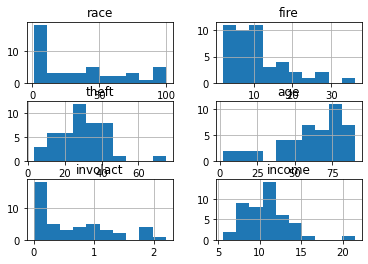

In [3]:
chredlin.hist()

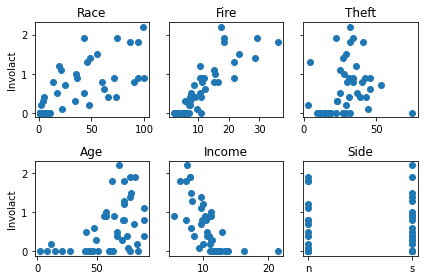

In [4]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = \
    plt.subplots(nrows=2, ncols=3, sharey=True)
ax1.scatter(chredlin.race, chredlin.involact)
ax1.set(title="Race")
ax1.set_ylabel("Involact")

ax2.scatter(chredlin.fire, chredlin.involact)
ax2.set(title="Fire")

ax3.scatter(chredlin.theft, chredlin.involact)
ax3.set(title="Theft")

ax4.scatter(chredlin.age, chredlin.involact)
ax4.set(title="Age")
ax4.set_ylabel("Involact")

ax5.scatter(chredlin.income, chredlin.involact)
ax5.set(title="Income")

ax6.scatter(chredlin.side, chredlin.involact)
ax6.set(title="Side")

fig.tight_layout()

Notice that the most eye-catching observation at the right tail of `theft` is actually *not* one of those two removed.

# Full model and diagnostics

In [5]:
lmod = smf.ols('involact ~ race + fire + theft + age + np.log(income)', chredlin).fit()
lmod.sumary()

                coefs stderr tvalues pvalues
Intercept      -0.577  1.080   -0.53  0.5964
race            0.007  0.003    2.62  0.0126
fire            0.050  0.009    5.79  0.0000
theft          -0.006  0.004   -1.48  0.1471
age             0.005  0.003    1.79  0.0818
np.log(income)  0.116  0.401    0.29  0.7745

n=45 p=6 Residual SD=0.303 R-squared=0.80


Notice that `age` and `theft` are no longer significant!

Luckily, what we are mostly interested in is whether `race` is significant, and that conclusion has not changed.

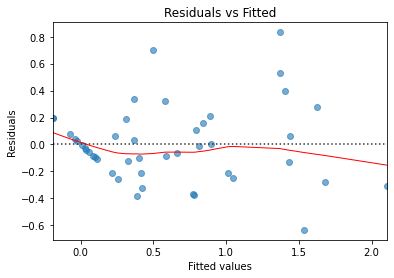

In [6]:
import seaborn as sns

# fitted values
model_fitted_y = lmod.fittedvalues

#  Plot
plot = sns.residplot(x=model_fitted_y, y='involact', data=chredlin, lowess=True, 
                     scatter_kws={'alpha': 0.6}, 
                     line_kws={'color': 'red', 'lw': 1, 'alpha': 1})

# Titel and labels
plot.set_title('Residuals vs Fitted')
plot.set_xlabel('Fitted values')
plot.set_ylabel('Residuals');

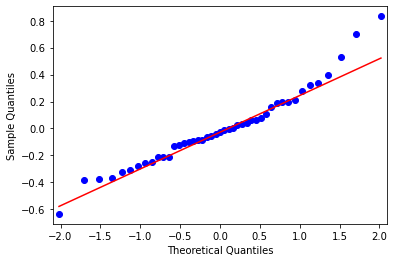

In [7]:
bla = sm.qqplot(lmod.resid, line="q")
# I assign the plot into a variable bla in order to prevent two plots showing up - this appears to be a bug

Diagnostic plots are harder to create and those shown above are not as useful as those in R (e.g. not showing the outliers).

Now, how about we decide to drop non-significant variables? But with the exception of `log(income)`, which I just want to keep, because I invested in it so heavily by log-transforming it :). That is, we drop `theft` and `age` from the model. The model-submodel F-test actually supports this (but remember, this is after we dropped two influential observations at the beginning of this script). For illustration purposes only, let's explore this in Matlab.

Finally, let's just export this notebook into an HTML file.

In [8]:
!jupyter nbconvert --to html 06-lm-Python.ipynb

[NbConvertApp] Converting notebook 06-lm-Python.ipynb to html
[NbConvertApp] Writing 647902 bytes to 06-lm-Python.html
